In [151]:
22# !pip install numpy==1.20.* --user

In [152]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import roc_auc_score,roc_curve
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.preprocessing import LabelEncoder


# Tuning
from sklearn.model_selection import GridSearchCV

# Feature Extraction
from sklearn.feature_selection import RFE

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, LabelEncoder

# Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensembles
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [153]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
df = pd.read_csv('merged.csv', index_col=0)
df.head(4)

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,age,height,weight,gender_ female,gender_ male,coffee_today_YES,sport_today_YES,smoker_NO,smoker_YES,feel_ill_today_YES
0,0.029937,0.009942,0.000000,0.087383,0.029510,0.011145,-0.024082,0.087383,0.000020,0.000008,...,27,175,80,0,1,0,0,1,0,0
1,0.021986,0.015845,0.000000,0.071558,0.017352,0.020817,-0.037843,0.071558,0.000012,0.000014,...,27,175,80,0,1,0,0,1,0,0
2,0.020839,0.011034,0.002752,0.054356,0.020839,0.011034,0.002752,0.054356,0.000014,0.000008,...,27,175,80,0,1,0,0,1,0,0
3,0.034449,0.003185,0.013761,0.040595,0.034449,0.003185,0.013761,0.040595,0.000024,0.000002,...,27,175,80,0,1,0,0,1,0,0


In [154]:
df.columns

Index(['net_acc_mean', 'net_acc_std', 'net_acc_min', 'net_acc_max',
       'ACC_x_mean', 'ACC_x_std', 'ACC_x_min', 'ACC_x_max', 'ACC_y_mean',
       'ACC_y_std', 'ACC_y_min', 'ACC_y_max', 'ACC_z_mean', 'ACC_z_std',
       'ACC_z_min', 'ACC_z_max', 'BVP_mean', 'BVP_std', 'BVP_min', 'BVP_max',
       'EDA_mean', 'EDA_std', 'EDA_min', 'EDA_max', 'EDA_phasic_mean',
       'EDA_phasic_std', 'EDA_phasic_min', 'EDA_phasic_max', 'EDA_smna_mean',
       'EDA_smna_std', 'EDA_smna_min', 'EDA_smna_max', 'EDA_tonic_mean',
       'EDA_tonic_std', 'EDA_tonic_min', 'EDA_tonic_max', 'Resp_mean',
       'Resp_std', 'Resp_min', 'Resp_max', 'TEMP_mean', 'TEMP_std', 'TEMP_min',
       'TEMP_max', 'BVP_peak_freq', 'TEMP_slope', 'subject', 'label', 'age',
       'height', 'weight', 'gender_ female', 'gender_ male',
       'coffee_today_YES', 'sport_today_YES', 'smoker_NO', 'smoker_YES',
       'feel_ill_today_YES'],
      dtype='object')

In [155]:
np.unique(df['label'])

array([0, 1, 2], dtype=int64)

In [156]:
labels = {
    0: "Amused",
    1: "Neutral",
    2: "Stressed"
}

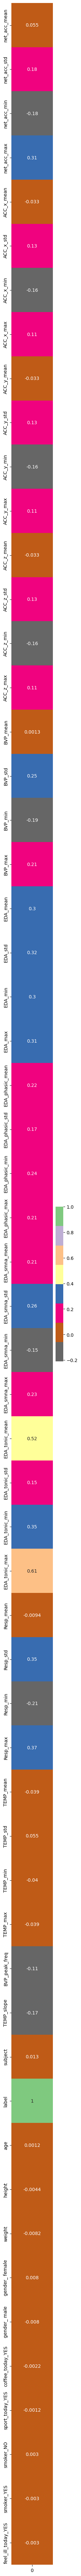

In [157]:
# nbconvert_remove

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(2,100))
cor = df.corr()
n_targets = len(df.columns)
cor_target = cor['label'].values.reshape(n_targets, 1)
cor_features = cor['label'].keys()
ax = sns.heatmap(cor_target, annot=True, cmap=plt.cm.Accent_r)
ax.set_yticklabels(cor_features)
plt.show()

In [158]:
# selected_feats =   [
#     'BVP_mean', 'BVP_std', 'EDA_phasic_mean', 'EDA_phasic_min', 'EDA_smna_min', 
#     'EDA_tonic_mean', 'Resp_mean', 'Resp_std', 'TEMP_mean', 'TEMP_std', 'TEMP_slope',
#     'BVP_peak_freq', 'age', 'height', 'weight'
#     ]
selected_feats =   [
    'BVP_mean', 'BVP_std', 'EDA_phasic_mean', 'EDA_phasic_min', 'EDA_smna_min', 
    'EDA_tonic_mean', 'Resp_mean', 'Resp_std', 'TEMP_mean', 'TEMP_std', 'TEMP_slope',
    'BVP_peak_freq'
    ]

x = df[selected_feats]
y = df['label']

x.shape, y.shape

((1178, 12), (1178,))

In [159]:
# x.to_csv('data.csv', index=False)

In [160]:
x

,BVP_mean,BVP_std,EDA_phasic_mean,EDA_phasic_min,EDA_smna_min,EDA_tonic_mean,Resp_mean,Resp_std,TEMP_mean,TEMP_std,TEMP_slope,BVP_peak_freq
0,-0.181673,107.648359,1.824289,0.367977,5.229658e-08,1.232164,0.148184,2.935617,35.817091,0.012674,-0.000169,0.135670
1,-0.830147,118.742089,2.109146,0.539150,3.096902e-08,0.377615,0.037545,2.843123,35.797568,0.029901,-0.000789,0.095023
2,0.939683,42.190039,0.152828,0.006950,4.725602e-08,1.727696,-0.021862,1.700333,35.712909,0.027612,-0.000717,0.076880
3,0.107404,41.606872,0.177595,0.002789,2.787285e-08,0.987927,0.097563,1.483260,35.700811,0.019504,0.000075,0.140271
4,-0.073620,43.121633,0.035014,0.001144,5.174645e-08,0.772262,0.062545,1.501585,35.744727,0.019386,0.000442,0.149321
...,...,...,...,...,...,...,...,...,...,...,...,...
1173,0.111318,9.667118,0.005391,0.000659,5.959032e-08,-0.304354,-0.052268,3.253162,32.887818,0.014358,0.000181,0.153846
1174,0.038265,9.805945,0.010002,0.000590,1.290328e-07,-0.316615,0.020345,2.634920,32.895225,0.012794,-0.000037,0.144715
1175,-0.096324,9.154524,0.008592,0.000192,7.792061e-08,-0.299992,0.091023,5.967216,32.854000,0.022450,-0.000512,0.131222
1176,-0.021164,5.935253,0.004904,0.000789,1.037083e-07,-0.305336,-0.028371,2.809360,32.792342,0.020222,-0.000532,0.158282


In [161]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1173    0
1174    0
1175    0
1176    0
1177    0
Name: label, Length: 1178, dtype: int64

In [162]:
x_train,x_test , y_train, y_test = train_test_split(x, y,test_size=0.2)

In [163]:
print("x_train shape: ",x_train.shape)
print("x_test shape: ",x_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (942, 12)
x_test shape:  (236, 12)
y_train shape:  (942,)
y_test shape:  (236,)


In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

# Logistic Regression¶ 

In [112]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')


lr.fit(x_train,y_train)#train model

Y_pred_lr = lr.predict(x_test)

score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 75.42 %


In [113]:
import pickle
with open('model/LogisticRegression_pickle', 'wb') as f:
    pickle.dump(lr,f)

              precision    recall  f1-score   support

           0       0.50      0.06      0.11        32
           1       0.74      0.88      0.80       129
           2       0.81      0.83      0.82        75

    accuracy                           0.75       236
   macro avg       0.68      0.59      0.58       236
weighted avg       0.73      0.75      0.71       236



<AxesSubplot:title={'center':'Logistic_Regression'}>

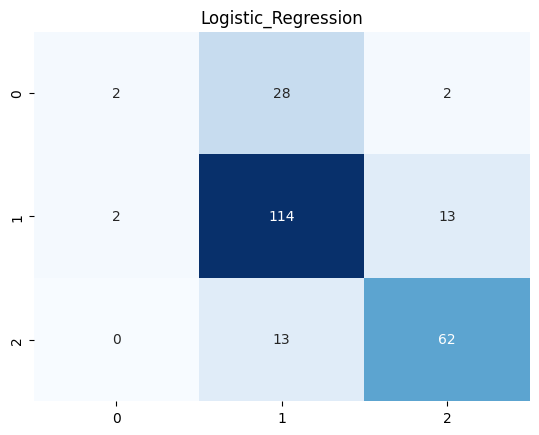

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

print(classification_report(y_test,Y_pred_lr))
lr_cm=confusion_matrix(y_test,Y_pred_lr)
plt.title("Logistic_Regression")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [115]:
# import pickle
# with open('model_MPH_LR_newest.sav','wb') as f:
#     pickle.dump(lr,f)

# SVM Linear 

In [116]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(x_train, y_train)

Y_pred_svm = sv.predict(x_test)
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 76.69 %


In [117]:
import pickle
with open('model/svm_pickle', 'wb') as f:
    pickle.dump(sv,f)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.73      0.92      0.82       129
           2       0.85      0.83      0.84        75

    accuracy                           0.77       236
   macro avg       0.53      0.58      0.55       236
weighted avg       0.67      0.77      0.71       236



<AxesSubplot:title={'center':'SVM'}>

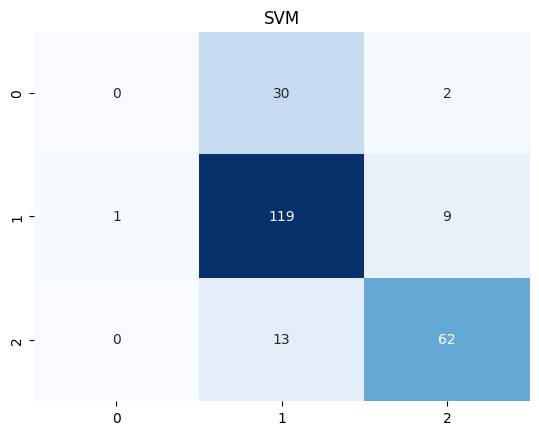

In [118]:
print(classification_report(y_test,Y_pred_svm))

lr_cm=confusion_matrix(y_test,Y_pred_svm)
plt.title("SVM")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

# Naive Bayes 

In [119]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train)

Y_pred_nb = nb.predict(x_test)

score_nb = round(accuracy_score(Y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 62.71 %


In [120]:
import pickle
with open('model/GaussianNB_pickle', 'wb') as f:
    pickle.dump(nb,f)

              precision    recall  f1-score   support

           0       0.32      0.81      0.46        32
           1       0.74      0.52      0.61       129
           2       0.85      0.73      0.79        75

    accuracy                           0.63       236
   macro avg       0.64      0.69      0.62       236
weighted avg       0.72      0.63      0.65       236



<AxesSubplot:title={'center':'Naive Bayes'}>

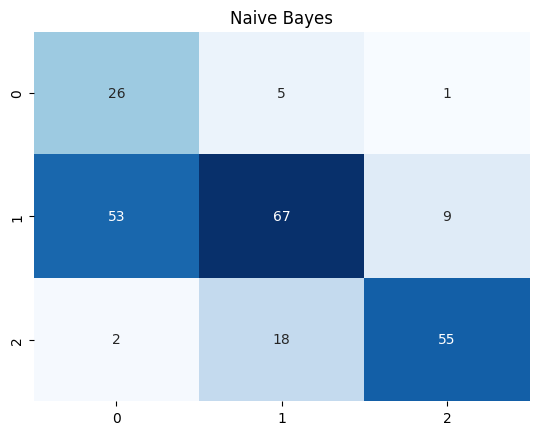

In [121]:
print(classification_report(y_test,Y_pred_nb))

lr_cm=confusion_matrix(y_test,Y_pred_nb)
plt.title("Naive Bayes")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

# Decision Tree 

In [122]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
Y_pred_dt = dt.predict(x_test)
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 87.29 %


In [123]:
import pickle
with open('model/DecisionTreeClassifier_pickle', 'wb') as f:
    pickle.dump(dt,f)

              precision    recall  f1-score   support

           0       0.71      0.78      0.75        32
           1       0.89      0.88      0.88       129
           2       0.92      0.91      0.91        75

    accuracy                           0.87       236
   macro avg       0.84      0.85      0.85       236
weighted avg       0.88      0.87      0.87       236



<AxesSubplot:title={'center':'Decision Tree'}>

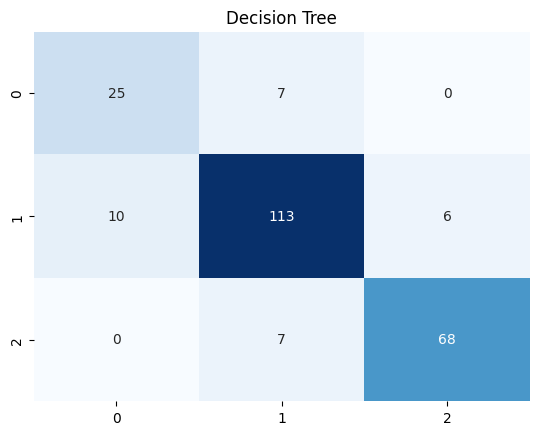

In [124]:
print(classification_report(y_test,Y_pred_dt))

lr_cm=confusion_matrix(y_test,Y_pred_dt)
plt.title("Decision Tree")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

# Random Forest 

In [125]:
rfc=RandomForestClassifier(n_estimators=10,n_jobs=2,verbose=2)
rfc.fit(x_train,y_train)
score_rf=rfc.score(x_test,y_test)
Y_pred_rf = rfc.predict(x_test)
score_rf=round(accuracy_score(Y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
The accuracy score achieved using Random Forest is: 89.83 %


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished


In [126]:
import pickle
with open('model/RandomForest_pickle', 'wb') as f:
    pickle.dump(rfc,f)
    
if __name__=='__main__':
    with open('model/RandomForest_pickle', 'rb') as f:
        rfc_users = pickle.load(f)

              precision    recall  f1-score   support

           0       0.71      0.78      0.75        32
           1       0.89      0.88      0.88       129
           2       0.92      0.91      0.91        75

    accuracy                           0.87       236
   macro avg       0.84      0.85      0.85       236
weighted avg       0.88      0.87      0.87       236



<AxesSubplot:title={'center':'Random Forest'}>

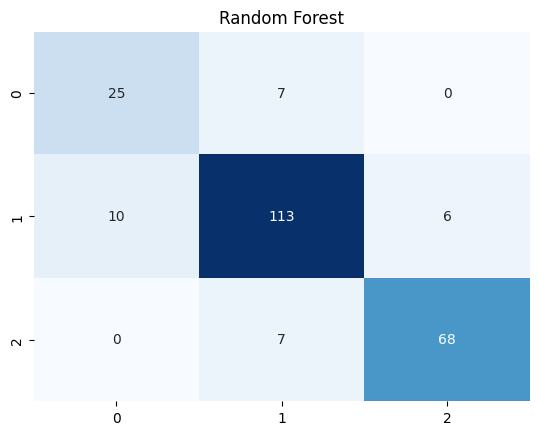

In [127]:
print(classification_report(y_test,Y_pred_dt))

lr_cm=confusion_matrix(y_test,Y_pred_dt)
plt.title("Random Forest")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

# ADA Boost 

In [128]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9),n_estimators=150)
ada.fit(x_train, y_train)

ada.score(x_test,y_test)
predictions = ada.predict(x_test)

In [129]:
score_ada = round(accuracy_score(predictions,y_test)*100,2)

print("The accuracy score achieved using Ada Boost is: "+str(score_ada)+" %")

The accuracy score achieved using Ada Boost is: 89.83 %


In [130]:
import pickle
with open('model/AdaBoost_pickle', 'wb') as f:
    pickle.dump(ada,f)
    
if __name__=='__main__':
    with open('model/AdaBoost_pickle', 'rb') as f:
        ada_users = pickle.load(f)

              precision    recall  f1-score   support

           0       0.95      0.59      0.73        32
           1       0.88      0.94      0.91       129
           2       0.91      0.96      0.94        75

    accuracy                           0.90       236
   macro avg       0.91      0.83      0.86       236
weighted avg       0.90      0.90      0.89       236



<AxesSubplot:title={'center':'ADA Boost'}>

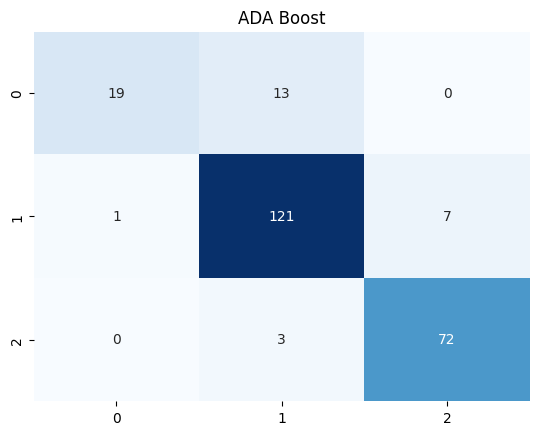

In [131]:
print(classification_report(y_test,predictions))

lr_cm=confusion_matrix(y_test,predictions)
plt.title("ADA Boost")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

# Linear Discriminant Analysis 

In [132]:
model = LinearDiscriminantAnalysis()
model.fit(x_train, y_train)

model.score(x_test,y_test)
LDA_predictions = model.predict(x_test)


score_LDA=round(accuracy_score(LDA_predictions,y_test)*100,2)

print("The accuracy score achieved using Linear Discriminant Analysis is: "+str(score_LDA)+" %")

The accuracy score achieved using Linear Discriminant Analysis is: 73.73 %


In [133]:
import pickle
with open('model/LinearDiscriminantAnalysi_pickle', 'wb') as f:
    pickle.dump(model,f)

              precision    recall  f1-score   support

           0       0.38      0.25      0.30        32
           1       0.73      0.81      0.77       129
           2       0.85      0.81      0.83        75

    accuracy                           0.74       236
   macro avg       0.65      0.63      0.63       236
weighted avg       0.72      0.74      0.73       236



<AxesSubplot:title={'center':'Linear Discriminant Analysis'}>

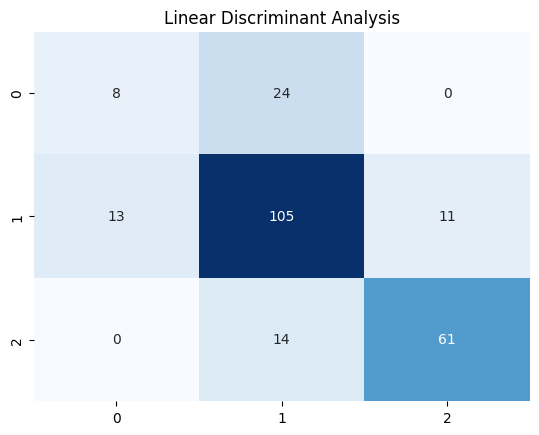

In [134]:
print(classification_report(y_test,LDA_predictions))

lr_cm=confusion_matrix(y_test,LDA_predictions)
plt.title("Linear Discriminant Analysis")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

# KNeighbors Classifier 

In [135]:
KNC = KNeighborsClassifier()
KNC.fit(x_train, y_train)

KNC_predictions = KNC.predict(x_test)


score_KNC=round(accuracy_score(KNC_predictions,y_test)*100,2)

print("The accuracy score achieved using KNeighbors Classifier is: "+str(score_KNC)+" %")

The accuracy score achieved using KNeighbors Classifier is: 76.27 %


              precision    recall  f1-score   support

           0       0.62      0.56      0.59        32
           1       0.79      0.81      0.80       129
           2       0.77      0.77      0.77        75

    accuracy                           0.76       236
   macro avg       0.73      0.71      0.72       236
weighted avg       0.76      0.76      0.76       236



<AxesSubplot:title={'center':'KNeighbors Classifier'}>

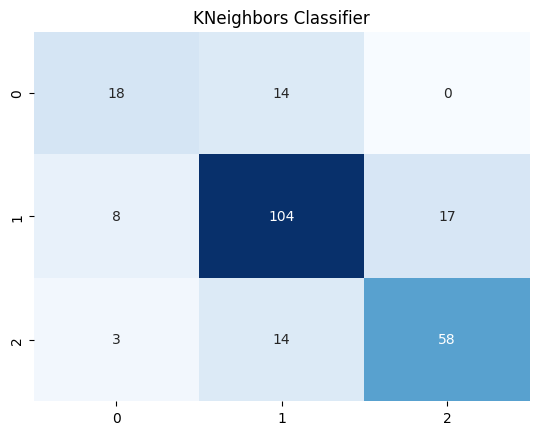

In [136]:
print(classification_report(y_test,KNC_predictions))

lr_cm=confusion_matrix(y_test,KNC_predictions)
plt.title("KNeighbors Classifier")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [137]:
import pickle
with open('model/KNeighborsClassifier_pickle', 'wb') as f:
    pickle.dump(KNC,f)
    
if __name__=='__main__':
    with open('model/KNeighborsClassifier_pickle', 'rb') as f:
        KNC_users = pickle.load(f)

# Gradient Boosting Classifier 

In [138]:
GBC = GradientBoostingClassifier(n_estimators=20, learning_rate=0.05, max_features=2, max_depth=2, random_state=0)
GBC.fit(x_train, y_train)

GBC_predictions = GBC.predict(x_test)


score_GBC=round(accuracy_score(GBC_predictions,y_test)*100,2)

print("The accuracy score achieved using Gradient Boosting Classifier is: "+str(score_GBC)+" %")

The accuracy score achieved using Gradient Boosting Classifier is: 80.08 %


In [139]:
import pickle
with open('model/GradientBoostingClassifier_pickle', 'wb') as f:
    pickle.dump(GBC,f)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.75      0.97      0.85       129
           2       0.91      0.85      0.88        75

    accuracy                           0.80       236
   macro avg       0.56      0.61      0.58       236
weighted avg       0.70      0.80      0.74       236



C:\Users\sushant\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sushant\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sushant\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

<AxesSubplot:title={'center':'Gradient Boosting Classifier'}>

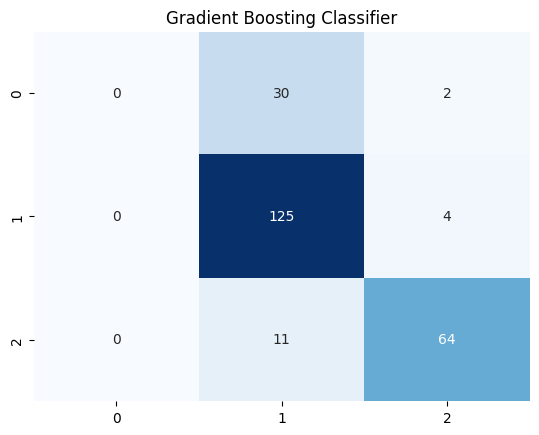

In [140]:
print(classification_report(y_test,GBC_predictions))

lr_cm=confusion_matrix(y_test,GBC_predictions)
plt.title("Gradient Boosting Classifier")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

# ExtraTrees Classifier

In [141]:
ETC = ExtraTreesClassifier(n_estimators=100, random_state=0)
ETC.fit(x_train, y_train)

ETC_predictions = ETC.predict(x_test)


score_ETC=round(accuracy_score(ETC_predictions,y_test)*100,2)

print("The accuracy score achieved using ExtraTrees Classifier is: "+str(score_ETC)+" %")

The accuracy score achieved using ExtraTrees Classifier is: 90.68 %


              precision    recall  f1-score   support

           0       1.00      0.59      0.75        32
           1       0.88      0.95      0.92       129
           2       0.92      0.96      0.94        75

    accuracy                           0.91       236
   macro avg       0.94      0.84      0.87       236
weighted avg       0.91      0.91      0.90       236



<AxesSubplot:title={'center':'ExtraTrees Classifier'}>

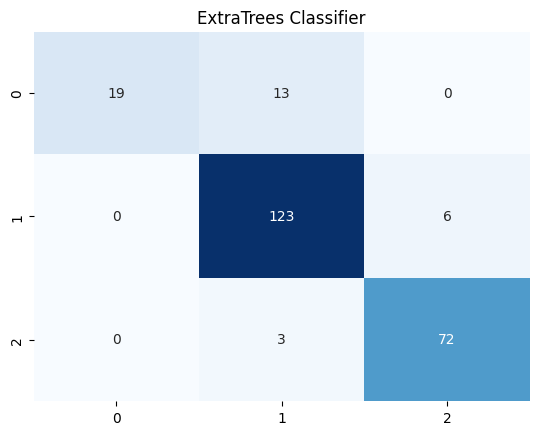

In [142]:
print(classification_report(y_test,ETC_predictions))

lr_cm=confusion_matrix(y_test,ETC_predictions)
plt.title("ExtraTrees Classifier")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [143]:
import pickle
with open('model/ExtraTreesClassifier_pickle', 'wb') as f:
    pickle.dump(ETC,f)
    
if __name__=='__main__':
    with open('model/ExtraTreesClassifier_pickle', 'rb') as f:
        etc_users = pickle.load(f)

# Kmeans

C:\Users\sushant\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sushant\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sushant\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sushant\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

Text(0.5, 1.0, 'Elbow Curve to find optimum K')

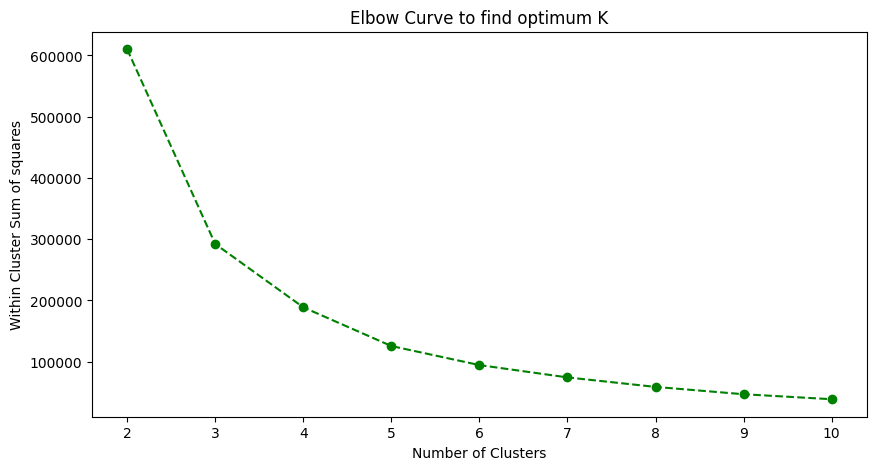

In [144]:
k = list(range(2,11))
sum_of_squared_distances = []
for i in k:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_train)
    sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(k, sum_of_squared_distances, 'go--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of squares')
plt.title('Elbow Curve to find optimum K')

In [145]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(x_train)
X_test_norm = preprocessing.normalize(x_test)

In [146]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [147]:
import pickle
with open('model/kmeans_pickle', 'wb') as f:
    pickle.dump(kmeans,f)

In [148]:
#Calculate which mushrooms fall into which clusters
clusters = kmeans.predict(X_test_norm)
clusters

array([0, 2, 0, 0, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 1, 1,
       0, 1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 1, 2, 0, 1, 0, 0, 2, 1,
       0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 1, 1, 0, 0,
       2, 1, 1, 1, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0,
       0, 2, 1, 2, 1, 1, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1,
       1, 1, 2, 1, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 0, 0, 1, 0,
       2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1,
       2, 1, 2, 2, 1, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2,
       1, 1, 0, 0, 1, 2, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 1])

In [149]:
from sklearn.metrics import silhouette_score

score_kmns = silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

print("The accuracy score achieved using Kmeans is: "+str(score_kmns)+" %")

The accuracy score achieved using Kmeans is: 0.5435435631989984 %


# TESTING CODE

In [150]:
import pickle
import numpy as np

# Load the trained model
# filename = 'model/trained_model.sav'
filename = 'model/AdaBoost_pickle'
loaded_model = pickle.load(open(filename, 'rb'))

# Define the selected features as an array
selected_feats = [
    -0.18167326172979, 107.648359232624, 1.82428900056985, 0.367977083159102, 5.22965802841446E-08,
    1.23216412228095, 0.148183977361684, 2.93561681223168, 35.8170909090908, 0.012673914122067, -0.000169059802087318,
    0.135669869983041
]

# Convert the selected features to a NumPy array and reshape it
X_test = np.array(selected_feats).reshape(1, -1)

# Make predictions using the loaded model
predictions = loaded_model.predict(X_test)

print("Predicted class:", predictions)

Predicted class: [1]


C:\Users\sushant\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


# CSV_READ_RECORD_TEST_CODE

In [193]:
import csv
import os

In [194]:
# Define the input CSV file path
input_csv_path = 'Test_data/Record_70.csv'

In [195]:
input_csv_path

'Test_data/Record_70.csv'

In [196]:
df=pd.read_csv(input_csv_path)

In [197]:
df

,BVP_mean,BVP_std,EDA_phasic_mean,EDA_phasic_min,EDA_smna_min,EDA_tonic_mean,Resp_mean,Resp_std,TEMP_mean,TEMP_std,TEMP_slope,BVP_peak_freq
0,0.001391,18.068585,0.002865,0.000028,1.209040e-07,-0.683969,0.081493,2.074925,34.128739,0.016825,-0.000289,0.140192


In [198]:
new_list=[]
filename='model/AdaBoost_pickle'
loaded_model_rf = pickle.load(open(filename, 'rb'))
rf1=loaded_model_rf.predict(df)
output_model=rf1[0]


print("-------------------------------------------------------------------------------")
print(output_model)
print("-------------------------------------------------------------------------------")

if output_model == 0:
    print("Amused")
    message = "The user is not affected by Amused"   
    print(message)
elif output_model == 1:
    print("Neutral")
    message = "The user is not affected by Neutral."
    print(message)  
else:
    print("Stressed")
    message = "The user is affected by Stressed."
    print(message)

-------------------------------------------------------------------------------
0
-------------------------------------------------------------------------------
Amused
The user is not affected by Amused


# create grapgh

In [201]:
import csv
import os

In [202]:
# Define the input CSV file path
input_csv_path = 'Test_data/Record_70.csv'

In [203]:
df=pd.read_csv(input_csv_path)

In [204]:
df

,BVP_mean,BVP_std,EDA_phasic_mean,EDA_phasic_min,EDA_smna_min,EDA_tonic_mean,Resp_mean,Resp_std,TEMP_mean,TEMP_std,TEMP_slope,BVP_peak_freq
0,0.001391,18.068585,0.002865,0.000028,1.209040e-07,-0.683969,0.081493,2.074925,34.128739,0.016825,-0.000289,0.140192


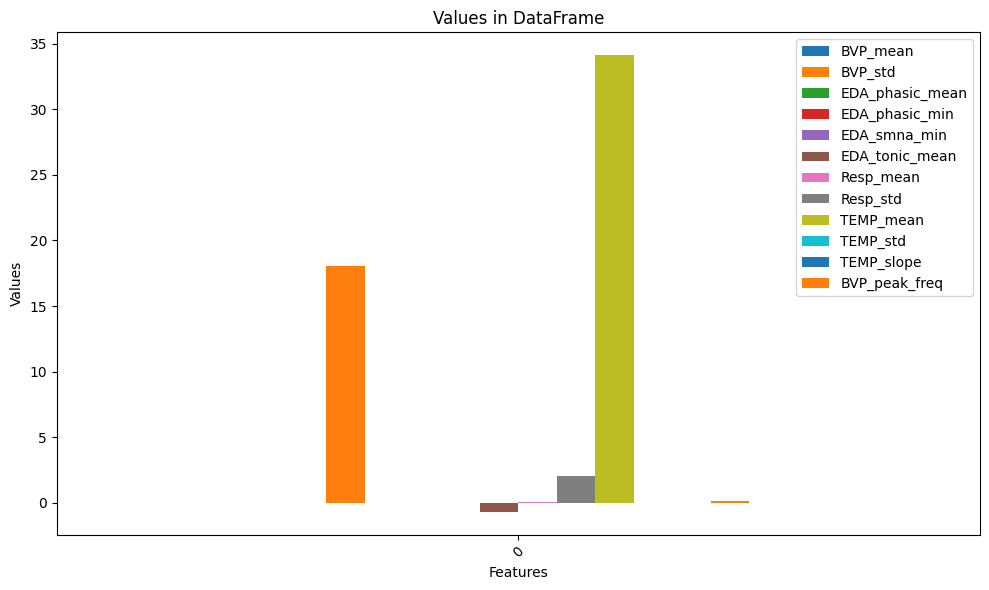

In [205]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the specified columns
# For example:
# df = pd.DataFrame({'BVP_mean': [0.001391], 'BVP_std': [18.068585], 'EDA_phasic_mean': [0.002865], ...})

# Plotting a bar plot for each column
plt.figure(figsize=(10, 6))
df.plot(kind='bar', ax=plt.gca())
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Values in DataFrame')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [210]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample DataFrame
df = pd.DataFrame({
    'BVP_mean': [0.001391], 'BVP_std': [18.068585], 'EDA_phasic_mean': [0.002865],
    'EDA_phasic_min': [0.000028], 'EDA_smna_min': [1.209040e-07], 'EDA_tonic_mean': [-0.683969],
    'Resp_mean': [0.081493], 'Resp_std': [2.074925], 'TEMP_mean': [34.128739],
    'TEMP_std': [0.016825], 'TEMP_slope': [-0.000289], 'BVP_peak_freq': [0.140192]
})

# Create a figure with subplots
fig = make_subplots(rows=1, cols=1)

# Add scatter plot for all columns
for column_name in df.columns:
    x_data = df.index
    y_data = df[column_name]
    scatter = go.Scatter(x=x_data, y=y_data, mode='lines+markers', name=column_name)
    fig.add_trace(scatter)

# Update figure layout
fig.update_layout(title='Real-time Graph', xaxis_title='Index', yaxis_title='Values')

# Define a callback function to update the graph on click
def update_graph(trace, points, selector):
    x_data = df.index
    for trace in fig.data:
        trace.y = df[trace.name]
        trace.x = x_data

# Assign the callback function to the graph
for trace in fig.data:
    trace.on_click(update_graph)

# Show the figure
fig.show()
